<a href="https://colab.research.google.com/github/Shorna-2019331049/Skill_Morph/blob/main/Assignment8_DT_RF_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## Dataset1 Preprocessing ( Used in Training )

In [2]:
import pandas as pd

txt_path = '/content/drive/MyDrive/skill_morph/CKD/chronic_kidney_disease_full.txt'
csv_path = '/content/drive/MyDrive/skill_morph/CKD/chronic_kidney_disease_full.csv'

df = pd.read_csv(txt_path, sep=',')
df.to_csv(csv_path, index=False)
print("File converted successfully and saved as:", csv_path)


File converted successfully and saved as: /content/drive/MyDrive/skill_morph/CKD/chronic_kidney_disease_full.csv


In [3]:
df.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd


In [4]:
import numpy as np
df.replace("?",np.nan,inplace = True)

In [5]:
df.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [6]:
df.dtypes

,0
age,object
bp,object
sg,object
al,object
su,object
rbc,object
pc,object
pcc,object
ba,object
bgr,object


In [7]:
print(df.isna().sum())

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [8]:
numeric_cols = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
cat_cols = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']

## Handling Categorical columns

In [9]:
for col in cat_cols:
  print(df[col].value_counts())
  print()


rbc
normal      201
abnormal     47
Name: count, dtype: int64

pc
normal      259
abnormal     76
Name: count, dtype: int64

pcc
notpresent    354
present        42
Name: count, dtype: int64

ba
notpresent    374
present        22
Name: count, dtype: int64

htn
no     251
yes    147
Name: count, dtype: int64

dm
no      260
yes     136
 yes      1
\tno      1
Name: count, dtype: int64

cad
no     364
yes     34
Name: count, dtype: int64

appet
good    317
poor     82
Name: count, dtype: int64

pe
no     323
yes     76
Name: count, dtype: int64

ane
no     339
yes     60
Name: count, dtype: int64

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64



In [10]:
df['class'].replace('ckd\t','ckd',inplace = True)

In [11]:
df['class'].value_counts()

,count
class,
ckd,250
notckd,150


In [12]:
df['dm'].replace({' yes':'yes' , '\tno':'no'},inplace=True)
df['dm'].value_counts()

,count
dm,
no,261
yes,137


In [13]:
for col in cat_cols:
  print(df[col].value_counts())
  print()

rbc
normal      201
abnormal     47
Name: count, dtype: int64

pc
normal      259
abnormal     76
Name: count, dtype: int64

pcc
notpresent    354
present        42
Name: count, dtype: int64

ba
notpresent    374
present        22
Name: count, dtype: int64

htn
no     251
yes    147
Name: count, dtype: int64

dm
no     261
yes    137
Name: count, dtype: int64

cad
no     364
yes     34
Name: count, dtype: int64

appet
good    317
poor     82
Name: count, dtype: int64

pe
no     323
yes     76
Name: count, dtype: int64

ane
no     339
yes     60
Name: count, dtype: int64

class
ckd       250
notckd    150
Name: count, dtype: int64



class
ckd       62.5
notckd    37.5
Name: count, dtype: float64


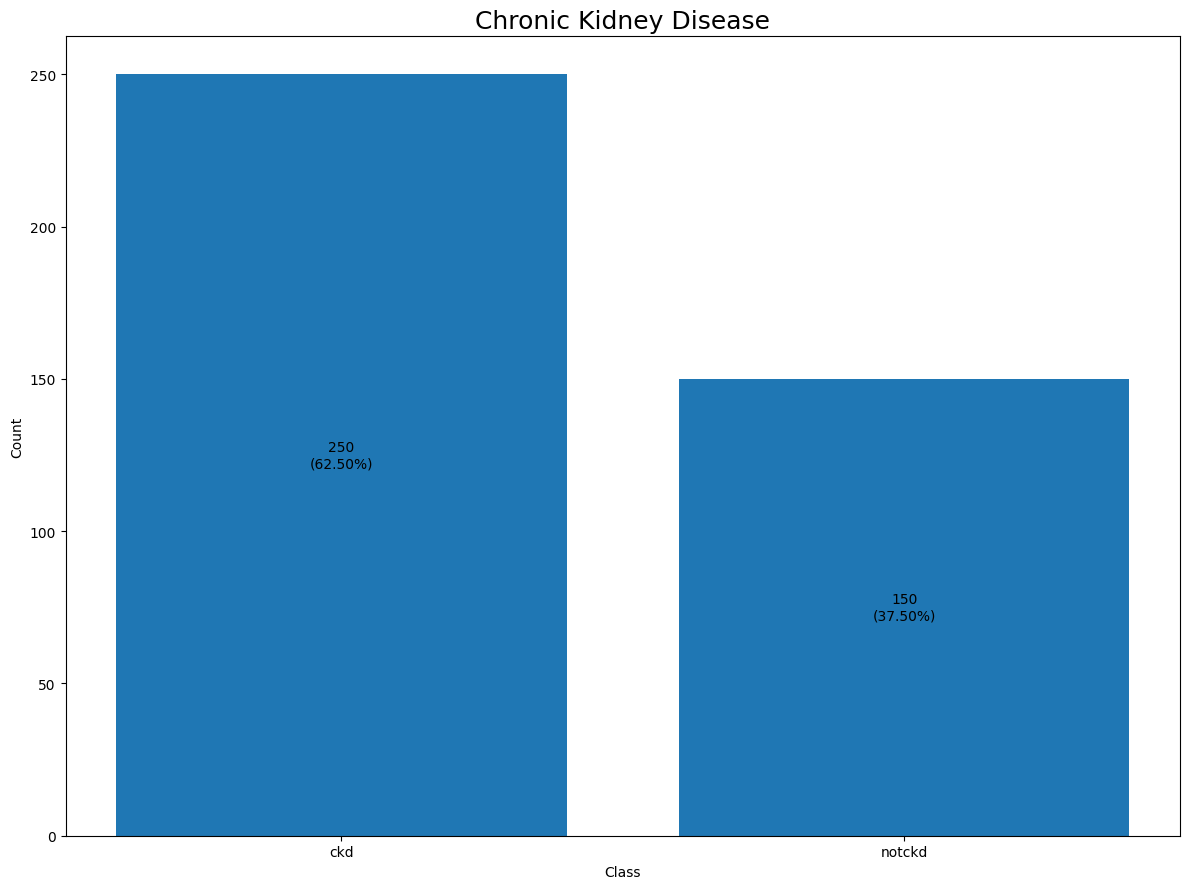

In [14]:
import matplotlib.pyplot as plt

target = df['class'].value_counts()
target_percentages = (target/target.sum())*100
print(target_percentages)

plt.figure(figsize=(12,9))
bars = plt.bar(target.index, target.values)

for idx, bar in enumerate(bars):
  height = bar.get_height()
  count_text = f'{target.values[idx]:,}'
  percent_text = f'({target_percentages.values[idx]:.2f}%)'

  plt.text(
      bar.get_x() + bar.get_width()/2, height/2, f'{count_text}\n{percent_text}',
      ha='center', va='center')

plt.title('Chronic Kidney Disease',fontsize = 18)
plt.xlabel('Class')
plt.ylabel('Count')
# plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


In [15]:
df['rbc_numeric'] = df['rbc'].map({'normal': 1, 'abnormal': 0})
df['pc_numeric'] = df['pc'].map({'normal': 1, 'abnormal': 0})
df['pcc_numeric'] = df['pcc'].map({'present': 1, 'notpresent': 0})
df['ba_numeric'] = df['ba'].map({'present': 1, 'notpresent': 0})
df['htn_numeric'] = df['htn'].map({'yes': 1, 'no': 0})
df['dm_numeric'] = df['dm'].map({'yes': 1, 'no': 0})
df['cad_numeric'] = df['cad'].map({'yes': 1, 'no': 0})
df['appet_numeric'] = df['appet'].map({'good': 1, 'poor': 0})
df['pe_numeric'] = df['pe'].map({'yes': 1, 'no': 0})
df['ane_numeric'] = df['ane'].map({'yes': 1, 'no': 0})
df['class_numeric'] = df['class'].map({'ckd': 1, 'notckd': 0})

df.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pc_numeric,pcc_numeric,ba_numeric,htn_numeric,dm_numeric,cad_numeric,appet_numeric,pe_numeric,ane_numeric,class_numeric
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [16]:
df.drop(cat_cols,axis = 1,inplace = True)

In [17]:
df.dtypes

,0
age,object
bp,object
sg,object
al,object
su,object
bgr,object
bu,object
sc,object
sod,object
pot,object


In [18]:
df.isna().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
bgr,44
bu,19
sc,17
sod,87
pot,88


In [19]:
for col in df.columns.tolist():
  if '_numeric' in col:
    print(col)
    df[col].fillna(df[col].mode()[0],inplace=True)

rbc_numeric
pc_numeric
pcc_numeric
ba_numeric
htn_numeric
dm_numeric
cad_numeric
appet_numeric
pe_numeric
ane_numeric
class_numeric


In [20]:
df.isna().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
bgr,44
bu,19
sc,17
sod,87
pot,88


## Handling Numeric Value

In [21]:
for col in numeric_cols:
  if '_numeric' not in col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [22]:
df.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
bgr,float64
bu,float64
sc,float64
sod,float64
pot,float64


In [23]:
df.isna().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
bgr,44
bu,19
sc,17
sod,87
pot,88


In [24]:
for col in numeric_cols:
  if '_numeric' not in col:
    df[col].fillna(df[col].mean(),inplace=True)

In [25]:
df.isna().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0
pot,0


In [26]:
def categorize_bp(bp):
    if bp < 70:
        return 0  # low
    elif bp <= 90:
        return 1  # normal
    else:
        return 2  # high

df['bp'] = df['bp'].apply(categorize_bp)

In [27]:
save_path = "/content/drive/MyDrive/skill_morph/CKD/chronic_kidney_disease_final.csv"
df.to_csv(save_path, index=False)

## Dataset 2 Preprocessing ( Used in testing)

In [28]:
import pandas as pd

txt_path = '/content/drive/MyDrive/skill_morph/CKD/ckd_v2.txt'
csv_path = '/content/drive/MyDrive/skill_morph/CKD/ckd_v2.csv'

df2 = pd.read_csv(txt_path, sep=',')
df2.to_csv(csv_path, index=False)
print("File converted successfully and saved as:", csv_path)

File converted successfully and saved as: /content/drive/MyDrive/skill_morph/CKD/ckd_v2.csv


In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/skill_morph/CKD/ckd_v2.csv')

In [30]:
df2.head(2)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12


In [31]:
df2.dtypes

,0
bp (Diastolic),int64
bp limit,int64
sg,object
al,object
class,object
rbc,int64
su,object
pc,int64
pcc,int64
ba,int64


In [32]:
import pandas as pd
import numpy as np

def range_to_midpoint(x):
    if pd.isna(x):
        return None
    if '-' in x:
        low, high = x.split('-')
        return (float(low.strip('<≥ ')) + float(high.strip('<≥ '))) / 2
    if x.startswith('≥'):
        return float(x[1:])
    if x.startswith('<'):
        return float(x[1:])-0.5  #choose a small value
    try:
        return float(x)
    except ValueError:
        return np.nan

df2['sg'] = df2['sg'].apply(range_to_midpoint)
df2['al'] = df2['al'].apply(range_to_midpoint)
df2['su'] = df2['su'].apply(range_to_midpoint)
df2['bgr'] = df2['bgr'].apply(range_to_midpoint)
df2['bu'] = df2['bu'].apply(range_to_midpoint)
df2['sod'] = df2['sod'].apply(range_to_midpoint)
df2['sc'] = df2['sc'].apply(range_to_midpoint)
df2['pot'] = df2['pot'].apply(range_to_midpoint)
df2['hemo'] = df2['hemo'].apply(range_to_midpoint)
df2['pcv'] = df2['pcv'].apply(range_to_midpoint)
df2['wbcc'] = df2['wbcc'].apply(range_to_midpoint)
df2['rbcc'] = df2['rbcc'].apply(range_to_midpoint)
df2['grf'] = df2['grf'].apply(range_to_midpoint)


In [33]:
df2.head(2)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.02,1.0,ckd,0,-0.5,0,0,0,...,0,0,0,0,0,0,227.944,s1,1,< 12
1,0,0,1.01,-0.5,ckd,0,-0.5,0,0,0,...,0,0,0,0,0,0,227.944,s1,1,< 12


In [34]:
def range_to_midpoint(x):
    if pd.isna(x):
        return None
    if '-' in x:
        low, high = x.split('-')
        val =  (float(low.strip('<≥ ')) + float(high.strip('<≥ '))) / 2
        return int(round(val))
    if x.startswith('≥'):
        return float(x[1:])
    if x.startswith('<'):
        return float(x[1:])-1  #choose a small value
    try:
        return float(x)
    except ValueError:
        return np.nan


df2['age'] = df2['age'].apply(range_to_midpoint)

In [35]:
df2.head(2)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.02,1.0,ckd,0,-0.5,0,0,0,...,0,0,0,0,0,0,227.944,s1,1,11.0
1,0,0,1.01,-0.5,ckd,0,-0.5,0,0,0,...,0,0,0,0,0,0,227.944,s1,1,11.0


In [36]:
df2.dtypes

,0
bp (Diastolic),int64
bp limit,int64
sg,float64
al,float64
class,object
rbc,int64
su,float64
pc,int64
pcc,int64
ba,int64


In [37]:
save_path = "/content/drive/MyDrive/skill_morph/CKD/ckd2_final.csv"
df2.to_csv(save_path, index=False)

column re-order and matching, then save

In [38]:
df1 = pd.read_csv("/content/drive/MyDrive/skill_morph/CKD/chronic_kidney_disease_final.csv")
df1.head(3)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_numeric,pcc_numeric,ba_numeric,htn_numeric,dm_numeric,cad_numeric,appet_numeric,pe_numeric,ane_numeric,class_numeric
0,48.0,1,1.02,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,0,1.02,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,1,1.01,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [39]:
df1.rename(columns={'rbc_numeric': 'rbc'}, inplace=True)
df1.rename(columns={'pc_numeric': 'pc'}, inplace=True)
df1.rename(columns={'pcc_numeric': 'pcc'}, inplace=True)
df1.rename(columns={'ba_numeric': 'ba'}, inplace=True)
df1.rename(columns={'htn_numeric': 'htn'}, inplace=True)
df1.rename(columns={'dm_numeric': 'dm'}, inplace=True)
df1.rename(columns={'cad_numeric': 'cad'}, inplace=True)
df1.rename(columns={'appet_numeric': 'appet'}, inplace=True)
df1.rename(columns={'pe_numeric': 'pe'}, inplace=True)
df1.rename(columns={'ane_numeric': 'ane'}, inplace=True)
df1.rename(columns={'class_numeric': 'class'}, inplace=True)

In [40]:
df1.shape

(400, 25)

In [41]:
df1.columns.tolist()

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [42]:
save_path = "/content/drive/MyDrive/skill_morph/CKD/ckd1_for_train.csv"
df1.to_csv(save_path, index=False)

In [43]:
df2 = pd.read_csv("/content/drive/MyDrive/skill_morph/CKD/ckd2_final.csv")
df2.head(3)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.02,1.0,ckd,0,-0.5,0,0,0,...,0,0,0,0,0,0,227.9440,s1,1,11.0
1,0,0,1.01,-0.5,ckd,0,-0.5,0,0,0,...,0,0,0,0,0,0,227.9440,s1,1,11.0
2,0,0,1.01,4.0,ckd,1,-0.5,1,0,1,...,0,0,0,1,0,0,139.8635,s1,1,11.0


In [44]:
df2 = df2.drop(columns=['bp (Diastolic)','grf','stage','affected'])
df2.shape

(200, 25)

In [45]:
df2.rename(columns={'bp limit': 'bp'}, inplace=True)

In [46]:
df2.columns.tolist()

['bp',
 'sg',
 'al',
 'class',
 'rbc',
 'su',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sod',
 'sc',
 'pot',
 'hemo',
 'pcv',
 'rbcc',
 'wbcc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'age']

In [47]:
df2['class']=df2['class'].map({'ckd':1,'notckd':0})
print(df2['class'].value_counts())

class
1    128
0     72
Name: count, dtype: int64


In [48]:
df2 = df2[df1.columns]
df2.columns.tolist()

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [49]:
df2.head(2)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,11.0,0,1.02,1.0,-0.5,111.5,47.6,3.15,140.5,6.81,...,0,0,0,0,0,0,0,0,0,1
1,11.0,0,1.01,-0.5,-0.5,133.0,47.6,3.15,135.5,6.81,...,0,0,0,0,0,0,0,0,0,1


In [50]:
save_path = "/content/drive/MyDrive/skill_morph/CKD/ckd2_for_test.csv"
df2.to_csv(save_path, index=False)

## Run the models

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df1 = pd.read_csv("/content/drive/MyDrive/skill_morph/CKD/ckd1_for_train.csv")
df1.head(3)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,1,1.02,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,0,1.02,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,1,1.01,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [53]:
df2 = pd.read_csv("/content/drive/MyDrive/skill_morph/CKD/ckd2_for_test.csv")
df2.head(3)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,11.0,0,1.02,1.0,-0.5,111.5,47.60,3.15,140.5,6.81,...,0,0,0,0,0,0,0,0,0,1
1,11.0,0,1.01,-0.5,-0.5,133.0,47.60,3.15,135.5,6.81,...,0,0,0,0,0,0,0,0,0,1
2,11.0,0,1.01,4.0,-0.5,111.5,67.15,3.15,135.5,6.81,...,1,0,1,0,0,0,1,0,0,1


In [54]:
x_train, x_test, y_train, y_test = df1.drop(columns=['class']), df2.drop(columns=['class']), df1['class'], df2['class']
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 24)
(200, 24)
(400,)
(200,)


In [55]:
print(y_test.value_counts())

class
1    128
0     72
Name: count, dtype: int64


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.3f}%")

precision = precision_score(y_test,y_pred)
print(f"Precision: {precision*100:.3f}%")

recall = recall_score(y_test,y_pred)
print(f"Recall: {recall*100:.3f}%")

f1 = f1_score(y_test,y_pred)
print(f"F1 Score: {f1*100:.3f}%")

Accuracy: 99.000%
Precision: 98.462%
Recall: 100.000%
F1 Score: 99.225%


[[ 70   2]
 [  0 128]]


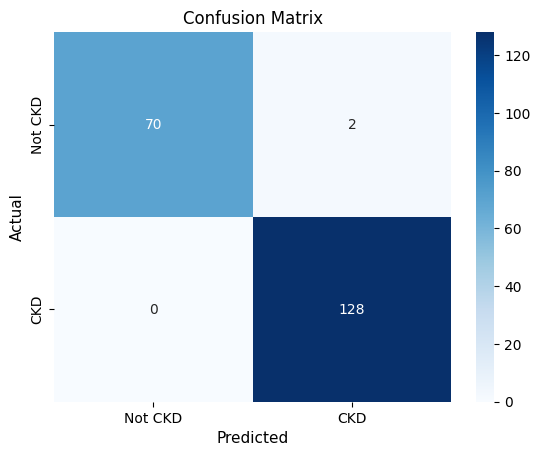

In [58]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

class_names = ['Not CKD','CKD']

plt.plot()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()

Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=70,random_state=42)
rf_model.fit(x_train,y_train)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.3f}%")

precision = precision_score(y_test,y_pred)
print(f"Precision: {precision*100:.3f}%")

recall = recall_score(y_test,y_pred)
print(f"Recall: {recall*100:.3f}%")

f1 = f1_score(y_test,y_pred)
print(f"F1 Score: {f1*100:.3f}%")

Accuracy: 94.000%
Precision: 91.429%
Recall: 100.000%
F1 Score: 95.522%


[[ 60  12]
 [  0 128]]


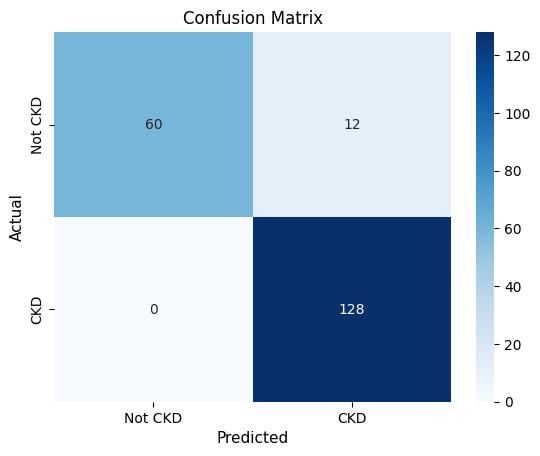

In [60]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

class_names = ['Not CKD','CKD']

plt.plot()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()

## KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=9)
KNN_model.fit(x_train,y_train)

y_pred = KNN_model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.3f}%")

precision = precision_score(y_test,y_pred)
print(f"Precision: {precision*100:.3f}%")

recall = recall_score(y_test,y_pred)
print(f"Recall: {recall*100:.3f}%")

f1 = f1_score(y_test,y_pred)
print(f"F1 Score: {f1*100:.3f}%")

Accuracy: 88.500%
Precision: 84.768%
Recall: 100.000%
F1 Score: 91.756%


[[ 49  23]
 [  0 128]]


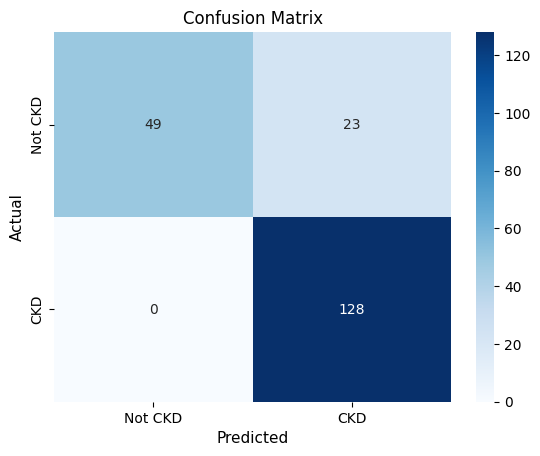

In [62]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

class_names = ['Not CKD','CKD']

plt.plot()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.show()